# Data Science Assessment 1

## Project Scenario & Introduction

Welcome to your first data science project! You are a junior data analyst at "DataGoods Inc.," a retail company. Your manager has provided you with a dataset of their sales transactions from the past year. Your task is to load this data, clean it, analyze it, and provide initial insights to help the business understand its performance.

This project will test your ability to use Python, Pandas, and NumPy to manipulate data and your skills in writing efficient, well-structured code.

The dataset contains the follwing columns:
| Column       | Description                                                         |
|---------------|----------------------------------------------------------------------|
| order_id      | A unique identifier for each order.                                  |
| product       | The name of the product purchased.                                   |
| quantity      | The number of units of the product sold in the order.                |
| price         | The price of a single unit of the product.                           |
| order_date    | The date the order was placed (format: YYYY-MM-DD).                  |
| customer_id   | A unique identifier for the customer.                                |


### Part 1: Data Loading and Initial Inspection

In [6]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Loading the dataset

file_path = ("Sales_data.xlsx")

df = pd.read_excel(file_path)


In [8]:
# Displaying the first 10 rows

df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
1,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
2,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
3,42,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564
4,44,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,32935,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616
5,72,CA-2017-114440,2017-09-14,2017-09-17,Second Class,TB-21520,Tracy Blumstein,Consumer,United States,Jackson,...,49201,Central,OFF-PA-10004675,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,19.050,3,0.0,8.7630
6,76,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,77041,Central,OFF-BI-10004182,Office Supplies,Binders,Economy Binders,1.248,3,0.8,-1.9344
7,77,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,77041,Central,FUR-FU-10000260,Furniture,Furnishings,"6"" Cubicle Wall Clock, Black",9.708,3,0.6,-5.8248
8,78,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,77041,Central,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",27.240,3,0.2,2.7240
9,85,US-2017-119662,2017-11-13,2017-11-16,First Class,CS-12400,Christopher Schild,Home Office,United States,Chicago,...,60623,Central,OFF-ST-10003656,Office Supplies,Storage,Safco Industrial Wire Shelving,230.376,3,0.2,-48.9549


The dataset can be grouped into 3 based on the columns data:
- Order data : These tells us information about the order and shipment, columns inclded are order_id, ship_mode etc.
- Customer data : These contains the customer details and their corresponding address for shipment.
- Product data : Here we have information on the product, their category, quantity and also price.

In [10]:
# Shape of DataFrame

df.shape

(3312, 21)

In [11]:
# Data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3312 non-null   int64         
 1   Order ID       3312 non-null   object        
 2   Order Date     3312 non-null   datetime64[ns]
 3   Ship Date      3312 non-null   datetime64[ns]
 4   Ship Mode      3312 non-null   object        
 5   Customer ID    3312 non-null   object        
 6   Customer Name  3312 non-null   object        
 7   Segment        3312 non-null   object        
 8   Country        3312 non-null   object        
 9   City           3312 non-null   object        
 10  State          3312 non-null   object        
 11  Postal Code    3312 non-null   int64         
 12  Region         3312 non-null   object        
 13  Product ID     3312 non-null   object        
 14  Category       3312 non-null   object        
 15  Sub-Category   3312 n

The columns all have the correct datatypes.

In [82]:
# Descriptive statistics

df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,3312.0,5087.107488,13.0,2655.75,5183.5,7498.25,9994.0,2817.482266
Order Date,3312,2017-08-07 07:56:57.391304448,2017-01-01 00:00:00,2017-05-15 00:00:00,2017-09-02 00:00:00,2017-11-06 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,3312,2017-08-11 05:40:52.173913088,2017-01-02 00:00:00,2017-05-19 00:00:00,2017-09-06 00:00:00,2017-11-10 00:00:00,2018-01-05 00:00:00,NaN
Postal Code,3312.0,56186.515097,1841.0,27978.75,60472.5,90032.0,99301.0,31980.375516
Sales,3312.0,221.381418,0.444,17.018,53.81,205.1057,13999.96,585.257531
Quantity,3312.0,3.766908,1.0,2.0,3.0,5.0,14.0,2.221776
Discount,3312.0,0.156467,0.0,0.0,0.2,0.2,0.8,0.207429
Profit,3312.0,28.21234,-3839.9904,1.7632,8.2968,28.315125,6719.9808,241.864342
total_sale,3312.0,1082.373068,0.444,47.998,184.32,727.332,56782.648,3276.792298


 From the numerical columns we can see the following :
 
 - Sales: The price for the products ranges from min of 0.444 to the max of 13,999.96 . These tells us that we have both relative cheap and expensive products bought. 75% of the orders are products with price around 205. These tells us that we have few bulk or expensive orders.
 - Quantity: We have a mean of 3.766908, these tells us that the average quantity per order is approximately 4 units. The minimum order is 1 unit and 75% of orders are 5 units. These suggests that most customers buy small or moderate quantities. While the max order is 14 units.
 - Discount : Some products don't have discount (min = 0). While the average discount is around 15.65%. The upper quartile or 75% of orders have 20% discount. Some discounts can go up to 80%.
 - Profit : The average profit is 28.21, the min and max profits are -3839.9904 and 6719.9808. These suggest relatively large lossess and large profits. The large losses could be due to inaccurate pricing or even huge discounts.
 - Total Sale : The average total sale per order is 1082.37 which is way greater than the median at 184.42 and also greater than the 75% of the total sale. The max is 56782.648. These suggests that small number of expensive orders move the revenue up.



- Also there is an average of 4 days between the order date and shipment date.
 

### Part 2: Data Cleaning & Preparation 

In [14]:
# Checking for missing Values

df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

We do not have missing values. Therefore we can proceed.

In [16]:
# Checking for duplicates 

df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


We also do not have any duplicates.

**New Feature Creation**

In [19]:
# Checking column labels

df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [20]:
# Creating new feature named total_sale

df['total_sale'] = df['Quantity'] * df['Sales']

In [21]:
# Checking the dataframe again

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total_sale
0,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,46.656
1,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,142.744
2,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,88.416
3,42,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,588.672
4,44,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,191.232


The new column  total_sale has been created and included in our dataframe.

### Part 3: Data Analysis 

#### Overall Business Questions

**Total revenue for the period**

In [25]:
df['total_sale'].sum()

3584819.6014

The total sum is 3,584,819.6014

**Average transaction value**

In [131]:
df['total_sale'].mean()

1082.3730680555557

The average transaction value is 1,082.37

**Total quantity of products sold**

In [32]:
df['Quantity'].sum()

12476

The total quantity of products sold 12476

#### Product Performance

**Top 5 best-selling products by total quantity sold**

In [36]:
# I group by product ID and Product Name to avoid duplicates, since the product ID is unique.

products = df.groupby(['Product ID','Product Name'], as_index = False)['Quantity'].aggregate('sum')
products

,Product ID,Product Name,Quantity
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",9
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",2
2,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,12
3,FUR-BO-10000780,O'Sullivan Plantations 2-Door Library in Landv...,5
4,FUR-BO-10001337,O'Sullivan Living Dimensions 2-Shelf Bookcases,6
...,...,...,...
1542,TEC-PH-10004897,Mediabridge Sport Armband iPhone 5s,3
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,1
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,5
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,3


The top 5 best performing products by sales are:

In [38]:
# I sort by Quantity in descending order to get the top 5

products.sort_values(by = 'Quantity', ascending = False).head(5)

,Product ID,Product Name,Quantity
1282,TEC-AC-10001772,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,34
123,FUR-FU-10000023,Eldon Wave Desk Accessories,31
284,FUR-TA-10001520,"Lesro Sheffield Collection Coffee Table, End T...",30
554,OFF-BI-10000301,GBC Instant Report Kit,29
1348,TEC-AC-10004510,Logitech Desktop MK120 Mouse and keyboard Combo,29


**Top 5 products by total revenue generated**

In [41]:
# Groupby produc id and product name with total_sale and the sum as aggregate

sale_tot = df.groupby(['Product ID','Product Name'],as_index = False)['total_sale'].agg('sum')
sale_tot

,Product ID,Product Name,total_sale
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",7426.5660
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",483.9200
2,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,1306.8020
3,FUR-BO-10000780,O'Sullivan Plantations 2-Door Library in Landv...,1873.1336
4,FUR-BO-10001337,O'Sullivan Living Dimensions 2-Shelf Bookcases,2673.6580
...,...,...,...
1542,TEC-PH-10004897,Mediabridge Sport Armband iPhone 5s,71.9280
1543,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,67.9920
1544,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,1099.0000
1545,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,482.3280


In [42]:
# Sort by total_sale in descending order to see the top 5

sale_tot_des = sale_tot.sort_values(by = 'total_sale', ascending = False)
sale_tot_des.head(5)

,Product ID,Product Name,total_sale
1373,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,132299.622
1438,TEC-PH-10001459,Samsung Galaxy Mega 6.3,82486.036
1232,OFF-SU-10002881,Martin Yale Chadless Opener Electric Letter Op...,59462.634
71,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,53765.166
594,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,48258.062


The top 5 products by total revenue generated:
- Canon imageCLASS 2200 Advanced Copier: USD 132,299.622
- Samsung Galaxy Mega 6.3: USD 82,486.036
- Martin Yale Chadless Opener Electric Letter: USD 59,462.634
- HON 5400 Series Task Chairs for Big and Tall:	USD 53,765.166
- GBC DocuBind TL300 Electric Binding System: USD 48,258.062

#### Customer Analysis using Function

Write a function called classify_customer(value) that takes a customer's total spending as input and returns "High Value" if the spending is above the 75th percentile, "Medium Value" if between the 25th and 75th percentile, and "Low Value" otherwise.

In [45]:
#Preview the dataframe again

df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total_sale
0,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,46.656
1,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,142.744
2,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,88.416


In [46]:
# I created a new dataframe that contains the customer's total spending (revenue)

cus_tot = df.groupby(['Customer ID', 'Customer Name'],as_index = False)['total_sale'].agg('sum')
cus_tot

,Customer ID,Customer Name,total_sale
0,AA-10315,Alex Avila,1111.900
1,AA-10375,Allen Armold,467.152
2,AA-10480,Andrew Allen,46.656
3,AA-10645,Anna Andreadi,25.920
4,AB-10060,Adam Bellavance,16833.200
...,...,...,...
688,XP-21865,Xylona Preis,1864.192
689,YC-21895,Yoseph Carroll,1501.360
690,YS-21880,Yana Sorensen,42092.232
691,ZC-21910,Zuschuss Carroll,1372.814


In [47]:
# I calculated the 25th and 75th percentile using numpy function

total_sale_ = cus_tot['total_sale']

per_25 = np.percentile(total_sale_,25)
per_75 = np.percentile(total_sale_,75)
per_25

739.55

In [48]:
per_75

5843.015

In [49]:
total_sale_

0       1111.900
1        467.152
2         46.656
3         25.920
4      16833.200
         ...    
688     1864.192
689     1501.360
690    42092.232
691     1372.814
692      184.320
Name: total_sale, Length: 693, dtype: float64

In [50]:
# Defining the function


def classify_customer(value):
    if value > per_75:
        return "High Value"
    elif value > per_25:
        return "Medium Value"
    else:
        return "Low Value"
    

In [51]:
# The new column is created in the new cus_tot since we are applying the function on the customer's total spending

cus_tot['customer_segment'] = cus_tot['total_sale'].apply(classify_customer)

In [52]:
cus_tot

,Customer ID,Customer Name,total_sale,customer_segment
0,AA-10315,Alex Avila,1111.900,Medium Value
1,AA-10375,Allen Armold,467.152,Low Value
2,AA-10480,Andrew Allen,46.656,Low Value
3,AA-10645,Anna Andreadi,25.920,Low Value
4,AB-10060,Adam Bellavance,16833.200,High Value
...,...,...,...,...
688,XP-21865,Xylona Preis,1864.192,Medium Value
689,YC-21895,Yoseph Carroll,1501.360,Medium Value
690,YS-21880,Yana Sorensen,42092.232,High Value
691,ZC-21910,Zuschuss Carroll,1372.814,Medium Value


In [90]:
# I renaned the total_sale to customer_total_spending since we have another total_sale(for product quantity) in the original df

cus_tot = cus_tot.rename(columns = {'total_sale':'customer_total_spending'})


In [92]:
cus_tot

,Customer ID,Customer Name,customer_total_spending,customer_segment
0,AA-10315,Alex Avila,1111.900,Medium Value
1,AA-10375,Allen Armold,467.152,Low Value
2,AA-10480,Andrew Allen,46.656,Low Value
3,AA-10645,Anna Andreadi,25.920,Low Value
4,AB-10060,Adam Bellavance,16833.200,High Value
...,...,...,...,...
688,XP-21865,Xylona Preis,1864.192,Medium Value
689,YC-21895,Yoseph Carroll,1501.360,Medium Value
690,YS-21880,Yana Sorensen,42092.232,High Value
691,ZC-21910,Zuschuss Carroll,1372.814,Medium Value


In [94]:
# merging the customer id, customer_total_spending and customer segment from cus_tot dataframe with the original df on the customer id

df_merge = pd.merge(
    df,cus_tot[['Customer ID','customer_total_spending','customer_segment']], on = 'Customer ID', how = 'left')

In [121]:
df_merge.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total_sale,customer_total_spending,customer_segment
0,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,46.656,46.656,Low Value
1,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,142.744,2080.734,Medium Value
2,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,88.416,300.536,Low Value
3,42,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,588.672,1241.296,Medium Value
4,44,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,191.232,7889.760,High Value


In [99]:
# Checking if there are new missing values

df_merge.isnull().sum()

Row ID                     0
Order ID                   0
Order Date                 0
Ship Date                  0
Ship Mode                  0
Customer ID                0
Customer Name              0
Segment                    0
Country                    0
City                       0
State                      0
Postal Code                0
Region                     0
Product ID                 0
Category                   0
Sub-Category               0
Product Name               0
Sales                      0
Quantity                   0
Discount                   0
Profit                     0
total_sale                 0
customer_total_spending    0
customer_segment           0
dtype: int64

In [101]:
# Check if the customer names duplicates

df[df_merge.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total_sale


There are no missing values or duplicates, because we merge using the unique customer ID.

### Part 4: Data Visualization

**Bar Chart showing the total revenue for the top 5 products**

In [106]:
# Dataframe for the top 5 products by revenue generated

top_5_rev = sale_tot_des.head(5)
top_5_rev

,Product ID,Product Name,total_sale
1373,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,132299.622
1438,TEC-PH-10001459,Samsung Galaxy Mega 6.3,82486.036
1232,OFF-SU-10002881,Martin Yale Chadless Opener Electric Letter Op...,59462.634
71,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,53765.166
594,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,48258.062


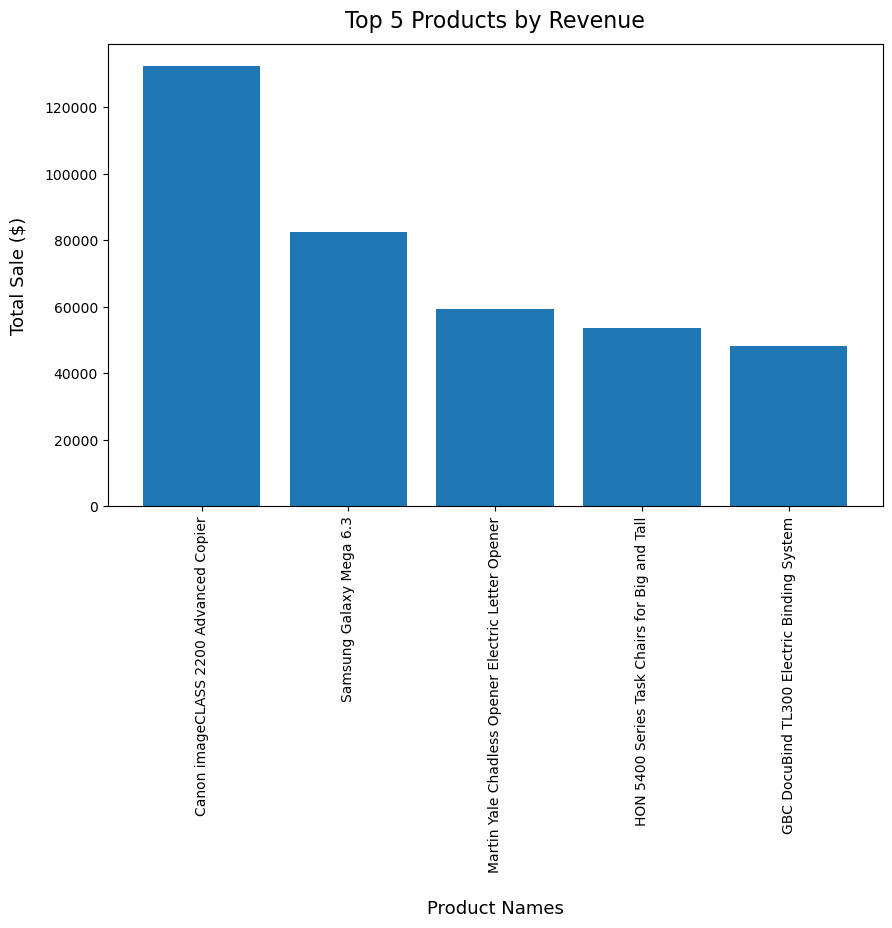

In [215]:
# Bar chart for the top 5 products by revenue

plt.figure(figsize = (10,6))
plt.bar(top_5_rev['Product Name'], top_5_rev['total_sale'])
plt.title("Top 5 Products by Revenue", fontsize = 16, pad = 12)
plt.ylabel('Total Sale ($)',labelpad= 12, fontsize = 13)
plt.xlabel('Product Names', labelpad = 20, fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

**Pie Chart showing the proportion of customers in each segment ("High", "Medium", "Low")**

In [113]:
# Preview the merged dataframe

df_merge.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,total_sale,customer_total_spending,customer_segment
0,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,46.656,46.656,Low Value
1,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,142.744,2080.734,Medium Value


In [115]:
# Since we are using the proportion, lets count how many customers fall in each segment

segment_counts = df_merge['customer_segment'].value_counts()
segment_counts

customer_segment
Medium Value    1720
High Value      1217
Low Value        375
Name: count, dtype: int64

In [117]:
# The index of the segment_count will be the label on the piechart

segment_count_index = segment_count.index
segment_count_index

Index(['Medium Value', 'High Value', 'Low Value'], dtype='object', name='customer_segment')

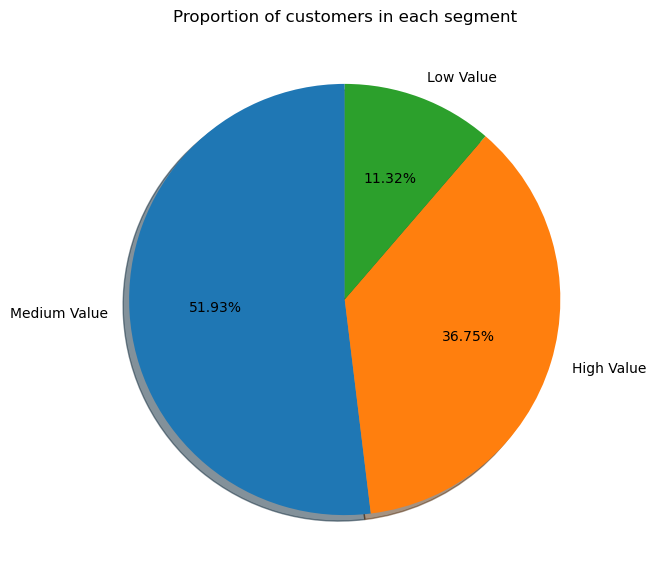

In [119]:
plt.figure(figsize = (7,7))
plt.title("Proportion of customers in each segment")
plt.pie(segment_counts,labels = segment_count_index, autopct = '%1.2f%%', shadow = True,startangle = 90)
plt.show()

### Part 5 : Conclusion & Reflection

**Checking the Category and Sub-Category of the Top 5 products by Revenue and Quantity**

In [200]:
# Grouping the product revenue including the category and sub category

x = df.groupby(['Product ID','Product Name','Category','Sub-Category'],as_index = False)['total_sale'].agg('sum')

In [211]:
# Getting the top 5 products by revenue generated

x.sort_values(by = 'total_sale', ascending = False).head(5)

,Product ID,Product Name,Category,Sub-Category,total_sale
1373,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,132299.622
1438,TEC-PH-10001459,Samsung Galaxy Mega 6.3,Technology,Phones,82486.036
1232,OFF-SU-10002881,Martin Yale Chadless Opener Electric Letter Op...,Office Supplies,Supplies,59462.634
71,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,Furniture,Chairs,53765.166
594,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,Office Supplies,Binders,48258.062


In [203]:
# Grouping the product revenue including the category and sub category

w = df.groupby(['Product ID','Product Name','Category','Sub-Category'], as_index = False)['Quantity'].aggregate('sum')

In [205]:
# Getting the top 5 products by quantity sold

w.sort_values(by = 'Quantity', ascending = False).head(5)

,Product ID,Product Name,Category,Sub-Category,Quantity
1282,TEC-AC-10001772,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,Technology,Accessories,34
123,FUR-FU-10000023,Eldon Wave Desk Accessories,Furniture,Furnishings,31
284,FUR-TA-10001520,"Lesro Sheffield Collection Coffee Table, End T...",Furniture,Tables,30
554,OFF-BI-10000301,GBC Instant Report Kit,Office Supplies,Binders,29
1348,TEC-AC-10004510,Logitech Desktop MK120 Mouse and keyboard Combo,Technology,Accessories,29


**Insights and Recommendation**

- Top 5 products by revenue : 40% are under the category Technology, the other 40% under Office Supplies and the remaining 20% under Furniture.
- Top 5 products by quantity sold : 40% under Technology, the other 40% under Furniture and the remaining 20% under Office supplies. Therefore we can see that for both revenue and quantity sold (top 5), the products are from 3 categories (Technology, Furniture, and Office supplies).
- From the descriptive statistics, we saw that we have some huge losses as well as large profits. I recommend reducing the discount percentage for some products to ensure consistent pricing. We should also review the profit margins for some products.
- Also from the descriptive statistics, we saw that majority of orders are in small or moderate quantites. I recommend using incentives like cuopons or bundles to encourage relatively large quantity order.